In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from more_itertools import flatten
%matplotlib inline
%load_ext autoreload
%autoreload 2

from dhdrnet.util import  ROOT_DIR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
evdf = pd.read_csv(ROOT_DIR / "fusion_records.csv").set_index("name").sort_index()
evdf = evdf.dropna()
evdf = evdf.drop_duplicates()

In [51]:
ev_categories = {ev_max:np.linspace(-ev_max,ev_max,5) for ev_max in range(4,8)}
ev_categories

{4: array([-4., -2.,  0.,  2.,  4.]),
 5: array([-5. , -2.5,  0. ,  2.5,  5. ]),
 6: array([-6., -3.,  0.,  3.,  6.]),
 7: array([-7. , -3.5,  0. ,  3.5,  7. ])}

In [52]:
from dhdrnet.vis_util import columns_with, get_metric_cat_groups

metric_cats = get_metric_cat_groups(evdf, ev_categories)
metric_cats

defaultdict(dict,
            {'mse': {'mse_-4.0': 4,
              'mse_-2.0': 4,
              'mse_2.0': 4,
              'mse_4.0': 4,
              'mse_-5.0': 5,
              'mse_-2.5': 5,
              'mse_2.5': 5,
              'mse_5.0': 5,
              'mse_-6.0': 6,
              'mse_-3.0': 6,
              'mse_3.0': 6,
              'mse_6.0': 6,
              'mse_-7.0': 7,
              'mse_-3.5': 7,
              'mse_3.5': 7,
              'mse_7.0': 7},
             'ssim': {'ssim_-4.0': 4,
              'ssim_-2.0': 4,
              'ssim_2.0': 4,
              'ssim_4.0': 4,
              'ssim_-5.0': 5,
              'ssim_-2.5': 5,
              'ssim_2.5': 5,
              'ssim_5.0': 5,
              'ssim_-6.0': 6,
              'ssim_-3.0': 6,
              'ssim_3.0': 6,
              'ssim_6.0': 6,
              'ssim_-7.0': 7,
              'ssim_-3.5': 7,
              'ssim_3.5': 7,
              'ssim_7.0': 7},
             'ms_ssim': {'ms_ssim_-4.

In [53]:
cnames = list(flatten(metric_cats.values()))
cnames

['mse_-4.0',
 'mse_-2.0',
 'mse_2.0',
 'mse_4.0',
 'mse_-5.0',
 'mse_-2.5',
 'mse_2.5',
 'mse_5.0',
 'mse_-6.0',
 'mse_-3.0',
 'mse_3.0',
 'mse_6.0',
 'mse_-7.0',
 'mse_-3.5',
 'mse_3.5',
 'mse_7.0',
 'ssim_-4.0',
 'ssim_-2.0',
 'ssim_2.0',
 'ssim_4.0',
 'ssim_-5.0',
 'ssim_-2.5',
 'ssim_2.5',
 'ssim_5.0',
 'ssim_-6.0',
 'ssim_-3.0',
 'ssim_3.0',
 'ssim_6.0',
 'ssim_-7.0',
 'ssim_-3.5',
 'ssim_3.5',
 'ssim_7.0',
 'ms_ssim_-4.0',
 'ms_ssim_-2.0',
 'ms_ssim_2.0',
 'ms_ssim_4.0',
 'ms_ssim_-5.0',
 'ms_ssim_-2.5',
 'ms_ssim_2.5',
 'ms_ssim_5.0',
 'ms_ssim_-6.0',
 'ms_ssim_-3.0',
 'ms_ssim_3.0',
 'ms_ssim_6.0',
 'ms_ssim_-7.0',
 'ms_ssim_-3.5',
 'ms_ssim_3.5',
 'ms_ssim_7.0']

In [54]:
mse_df = evdf[cnames].loc[:,lambda df: [c for c in df.columns if c.startswith("mse")]]
mse_df = mse_df.rename(columns=lambda c: float(c.split("_")[-1]))
mse_df.iloc[1]

-4.0    0.000706
-2.0    0.000633
 2.0    0.000741
 4.0    0.000607
-5.0    0.000718
-2.5    0.000718
 2.5    0.000719
 5.0    0.000652
-6.0    0.000681
-3.0    0.000718
 3.0    0.000674
 6.0    0.000725
-7.0    0.000704
-3.5    0.000729
 3.5    0.000697
 7.0    0.000728
Name: 0006_20160721_170707_736, dtype: float64

In [55]:
from pandas.api.types import CategoricalDtype

groups = {metric: evdf.groupby(cat,axis=1) for metric, cat in metric_cats.items()}
choices = []
metric_cols = []
for metric, group in groups.items():
    if metric == "mse": 
        vcs = group.idxmin(axis=1)
    else:
        vcs = group.idxmax(axis=1)
    choices.append(vcs)

choices_df = pd.concat(choices, axis=0)
choices_df["metric"] = choices_df.loc[:,4.0].apply(lambda r: "_".join((str(r).split("_")[:-1])))
choices_df = choices_df.reset_index()
# choices_df["name"] = choices_df["name"].astype(CategoricalDtype(pd.unique(choices_df["name"])))
# choices_df["metric"] = choices_df["metric"].astype(CategoricalDtype(metric_cats.keys()))
choices_df = choices_df.set_index(["name","metric"])
choices_df = choices_df.applymap(lambda e: str(e).split("_")[-1])
choices_df

,,4.0,5.0,6.0,7.0
name,metric,,,,
0006_20160721_163256_525,mse,-4.0,5.0,-3.0,3.5
0006_20160721_170707_736,mse,4.0,5.0,3.0,3.5
0006_20160721_172953_515,mse,-4.0,2.5,6.0,3.5
0006_20160721_175239_909,mse,4.0,-2.5,-3.0,3.5
0006_20160721_175246_335,mse,4.0,-5.0,-6.0,3.5
...,...,...,...,...,...
synthetic_lines_day_motion_blur,ms_ssim,-2.0,2.5,-6.0,-7.0
synthetic_lines_night_motion_blur,ms_ssim,2.0,-2.5,-6.0,3.5
synthetic_points_hawk_day,ms_ssim,-4.0,5.0,-3.0,-3.5


In [56]:
choices_df = choices_df.sort_index(level="name")
names, _ = zip(*choices_df.index.values)
names = pd.Series(pd.unique(names))
names

0                      0006_20160721_163256_525
1                      0006_20160721_170707_736
2                      0006_20160721_172953_515
3                      0006_20160721_175239_909
4                      0006_20160721_175246_335
                         ...                   
3627            synthetic_lines_day_motion_blur
3628          synthetic_lines_night_motion_blur
3629                  synthetic_points_hawk_day
3630      synthetic_points_hawk_day_motion_blur
3631    synthetic_points_hawk_night_motion_blur
Length: 3632, dtype: object

In [64]:
names_train = names.sample(frac=0.8)
names_test = names.loc[names.index.difference(names_train.index)]
choices_train = choices_df.loc[names_train]
choices_test = choices_df.loc[names_test]
print(f"{len(names_train)=}")
choices_train.to_csv(ROOT_DIR/"precomputed_data"/"train.choices.csv")
choices_test.to_csv(ROOT_DIR/"precomputed_data" / "test.choices.csv")
choices_train

len(names_train)=2906


4.0   5.0   6.0  7.0
name                                    metric                        
0006_20160721_163256_525                ms_ssim  -4.0   5.0  -3.0  3.5
                                        mse      -4.0   5.0  -3.0  3.5
                                        ssim     -4.0   2.5   3.0  7.0
0006_20160721_170707_736                ms_ssim  -2.0   5.0  -6.0  3.5
                                        mse       4.0   5.0   3.0  3.5
...                                               ...   ...   ...  ...
synthetic_points_hawk_day_motion_blur   mse      -4.0   2.5  -6.0  7.0
                                        ssim     -4.0   2.5  -3.0  7.0
synthetic_points_hawk_night_motion_blur ms_ssim   4.0  -2.5   6.0  3.5
                                        mse       4.0  -2.5  -3.0  3.5
                                        ssim      4.0  -2.5  -3.0  3.5

[8718 rows x 4 columns]

In [61]:
ev_train = evdf.loc[names_train]
ev_test = evdf.loc[names_test]
print(len(ev_train))
print(len(ev_test))
ev_train.to_csv(ROOT_DIR/"precomputed_data" / "train.stats.csv")
ev_test.to_csv(ROOT_DIR/"precomputed_data" / "test.stats.csv")

2906
726


In [62]:
len(choices_train)

8718

In [63]:
c2 = pd.read_csv(ROOT_DIR/"precomputed_data"/"train.choices.csv")
s2 = pd.read_csv(ROOT_DIR/"precomputed_data"/"train.stats.csv")
c2.iloc[0]

name      0006_20160721_163256_525
metric                     ms_ssim
4.0                             -4
5.0                              5
6.0                             -3
7.0                            3.5
Name: 0, dtype: object

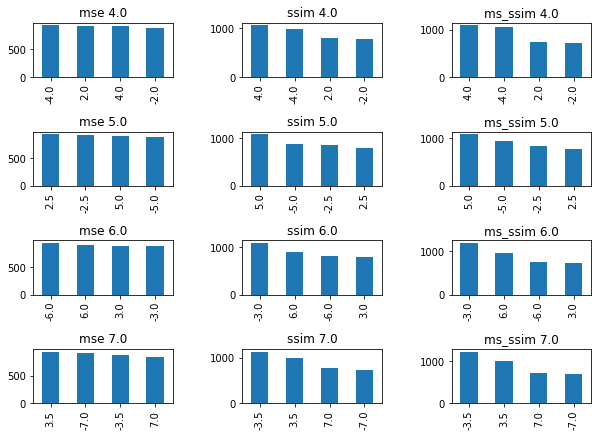

In [326]:
fig, ax = plt.subplots(len(choices_df.columns),len(metrics))
# fig.tight_layout()
for i, metric in enumerate(metrics):
    for j, cat in enumerate(choices_df.columns):
        choices_df.xs(metric, level="metric").loc[:,cat].value_counts().plot(
            kind="bar",
            ax=ax[j][i],
            title=f"{metric} {cat}",
            figsize=(10,7)
        )
plt.subplots_adjust(hspace=1.0, wspace=0.5)
plt.savefig("all_ev_baseline")
plt.show()

In [242]:
for groups["mse"]

In [327]:
def parse_range(name):
    parts = name.split("[",)[1:]
    asnums = sorted(tuple(float(part[:-1]) for part in parts))
    return asnums

In [328]:
optdf = pd.read_csv(ROOT_DIR / "opt_pairs_new.csv")
optdf = optdf.set_index("name")
optdf

,mse_[-4.0][-2.0],mse_[-4.0][0.0],mse_[-4.0][2.0],mse_[-4.0][4.0],mse_[-2.0][0.0],mse_[-2.0][2.0],mse_[-2.0][4.0],mse_[0.0][2.0],mse_[0.0][4.0],mse_[2.0][4.0],...,ms_ssim_[-7.0][-3.5],ms_ssim_[-7.0][0.0],ms_ssim_[-7.0][3.5],ms_ssim_[-7.0][7.0],ms_ssim_[-3.5][0.0],ms_ssim_[-3.5][3.5],ms_ssim_[-3.5][7.0],ms_ssim_[0.0][3.5],ms_ssim_[0.0][7.0],ms_ssim_[3.5][7.0]
name,,,,,,,,,,,,,,,,,,,,,
0127_20161018_111029_303,0.090015,0.089465,0.087303,0.078923,0.089494,0.087313,0.078925,0.087428,0.078962,0.079402,...,0.998652,0.998662,0.998773,0.999690,0.998662,0.998773,0.999690,0.998772,0.999690,0.999685
6G7M_20150321_124944_821,0.391223,0.388934,0.379865,0.344185,0.388940,0.379808,0.344115,0.379857,0.343933,0.344257,...,0.992846,0.992898,0.993472,0.998343,0.992898,0.993473,0.998343,0.993476,0.998346,0.998354
0037_20160717_132116_222,0.141433,0.140565,0.137135,0.123769,0.140602,0.137146,0.123771,0.137313,0.123821,0.124479,...,0.996192,0.996221,0.996538,0.999161,0.996221,0.996538,0.999161,0.996536,0.999161,0.999147
33TJ_20150820_180403_156,0.176385,0.175287,0.170921,0.153922,0.175334,0.170934,0.153923,0.171136,0.153980,0.154793,...,0.996899,0.996923,0.997185,0.999339,0.996922,0.997185,0.999339,0.997184,0.999339,0.999326
33TJ_20150613_094235_247,0.088427,0.087887,0.085761,0.077496,0.087913,0.085769,0.077497,0.085874,0.077528,0.077939,...,0.998398,0.998410,0.998541,0.999636,0.998410,0.998541,0.999636,0.998540,0.999636,0.999630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0039_20141010_073849_587,0.192254,0.191081,0.186399,0.168144,0.191119,0.186403,0.168137,0.186577,0.168164,0.168880,...,0.996099,0.996128,0.996455,0.999150,0.996128,0.996455,0.999150,0.996454,0.999151,0.999141
0009_20160703_170423_902,0.225976,0.224599,0.219159,0.198037,0.224657,0.219176,0.198037,0.219433,0.198105,0.199103,...,0.996058,0.996088,0.996413,0.999109,0.996088,0.996413,0.999109,0.996411,0.999109,0.999096
0037_20160717_131556_105,0.163726,0.162729,0.158809,0.143613,0.162780,0.158826,0.143617,0.159032,0.143682,0.144470,...,0.997543,0.997561,0.997762,0.999432,0.997561,0.997762,0.999432,0.997761,0.999432,0.999424


In [329]:
ev_maximums = list(range(4,8))
ev_maximums


[4, 5, 6, 7]

In [330]:
from collections import defaultdict
# groups = defaultdict(list)
groups = {}
mse_groups = {}
ssim_groups = {}
for ev_max in ev_maximums:
    for ev_pair, colname in zip(map(parse_range, optdf.columns),optdf.columns):
        if all(ev in ev_categories[ev_max] for ev in ev_pair):
            metric = "_".join(colname.split("_")[:-1])
#             groups[colname] = f"{metric}_ev_{ev_max}"
            if metric == "mse":
                mse_groups[colname] = ev_max
            if "ssim" in metric:
                ssim_groups[colname] = f"{metric}_ev_{ev_max}"

# grouped = optdf.groupby(groups, axis=1)
opt_mse = optdf.groupby(mse_groups,axis=1)
opt_ssim = optdf.groupby(ssim_groups,axis=1)

In [331]:
opt_choice_mse = opt_mse.idxmin(axis=1).applymap(parse_range)
opt_choice_ssim = opt_ssim.idxmax(axis=1).applymap(parse_range)

In [332]:
mse_groups

{'mse_[-4.0][-2.0]': 4,
 'mse_[-4.0][0.0]': 4,
 'mse_[-4.0][2.0]': 4,
 'mse_[-4.0][4.0]': 4,
 'mse_[-2.0][0.0]': 4,
 'mse_[-2.0][2.0]': 4,
 'mse_[-2.0][4.0]': 4,
 'mse_[0.0][2.0]': 4,
 'mse_[0.0][4.0]': 4,
 'mse_[2.0][4.0]': 4,
 'mse_[-5.0][-2.5]': 5,
 'mse_[-5.0][0.0]': 5,
 'mse_[-5.0][2.5]': 5,
 'mse_[-5.0][5.0]': 5,
 'mse_[-2.5][0.0]': 5,
 'mse_[-2.5][2.5]': 5,
 'mse_[-2.5][5.0]': 5,
 'mse_[0.0][2.5]': 5,
 'mse_[0.0][5.0]': 5,
 'mse_[2.5][5.0]': 5,
 'mse_[-6.0][-3.0]': 6,
 'mse_[-6.0][0.0]': 6,
 'mse_[-6.0][3.0]': 6,
 'mse_[-6.0][6.0]': 6,
 'mse_[-3.0][0.0]': 6,
 'mse_[-3.0][3.0]': 6,
 'mse_[-3.0][6.0]': 6,
 'mse_[0.0][3.0]': 6,
 'mse_[0.0][6.0]': 6,
 'mse_[3.0][6.0]': 6,
 'mse_[-7.0][-3.5]': 7,
 'mse_[-7.0][0.0]': 7,
 'mse_[-7.0][3.5]': 7,
 'mse_[-7.0][7.0]': 7,
 'mse_[-3.5][0.0]': 7,
 'mse_[-3.5][3.5]': 7,
 'mse_[-3.5][7.0]': 7,
 'mse_[0.0][3.5]': 7,
 'mse_[0.0][7.0]': 7,
 'mse_[3.5][7.0]': 7}

In [333]:
opt_choice_mse

,4.0,5.0,6.0,7.0
name,,,,
0127_20161018_111029_303,"[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]"
6G7M_20150321_124944_821,"[0.0, 4.0]","[0.0, 5.0]","[3.0, 6.0]","[3.5, 7.0]"
0037_20160717_132116_222,"[-4.0, 4.0]","[-2.5, 5.0]","[-3.0, 6.0]","[-3.5, 7.0]"
33TJ_20150820_180403_156,"[-4.0, 4.0]","[-2.5, 5.0]","[-3.0, 6.0]","[0.0, 7.0]"
33TJ_20150613_094235_247,"[-4.0, 4.0]","[-2.5, 5.0]","[-3.0, 6.0]","[-3.5, 7.0]"
...,...,...,...,...
0039_20141010_073849_587,"[-2.0, 4.0]","[0.0, 5.0]","[0.0, 6.0]","[0.0, 7.0]"
0009_20160703_170423_902,"[-4.0, 4.0]","[-2.5, 5.0]","[0.0, 6.0]","[0.0, 7.0]"
0037_20160717_131556_105,"[-4.0, 4.0]","[-5.0, 5.0]","[-3.0, 6.0]","[-3.5, 7.0]"


In [334]:
opt_choice_ssim

,ms_ssim_ev_4,ms_ssim_ev_5,ms_ssim_ev_6,ms_ssim_ev_7,ssim_ev_4,ssim_ev_5,ssim_ev_6,ssim_ev_7
name,,,,,,,,
0127_20161018_111029_303,"[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]","[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]"
6G7M_20150321_124944_821,"[0.0, 4.0]","[0.0, 5.0]","[3.0, 6.0]","[3.5, 7.0]","[0.0, 4.0]","[2.5, 5.0]","[3.0, 6.0]","[3.5, 7.0]"
0037_20160717_132116_222,"[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]","[-4.0, 4.0]","[-2.5, 5.0]","[-3.0, 6.0]","[-7.0, 7.0]"
33TJ_20150820_180403_156,"[-4.0, 4.0]","[-5.0, 5.0]","[-3.0, 6.0]","[0.0, 7.0]","[-4.0, 4.0]","[-2.5, 5.0]","[-3.0, 6.0]","[0.0, 7.0]"
33TJ_20150613_094235_247,"[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]","[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]"
...,...,...,...,...,...,...,...,...
0039_20141010_073849_587,"[-2.0, 4.0]","[0.0, 5.0]","[0.0, 6.0]","[0.0, 7.0]","[-2.0, 4.0]","[0.0, 5.0]","[0.0, 6.0]","[0.0, 7.0]"
0009_20160703_170423_902,"[-4.0, 4.0]","[-2.5, 5.0]","[-6.0, 6.0]","[0.0, 7.0]","[-4.0, 4.0]","[-2.5, 5.0]","[0.0, 6.0]","[0.0, 7.0]"
0037_20160717_131556_105,"[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]","[-4.0, 4.0]","[-5.0, 5.0]","[-6.0, 6.0]","[-7.0, 7.0]"


<ipython-input-335-7d1828e93047>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


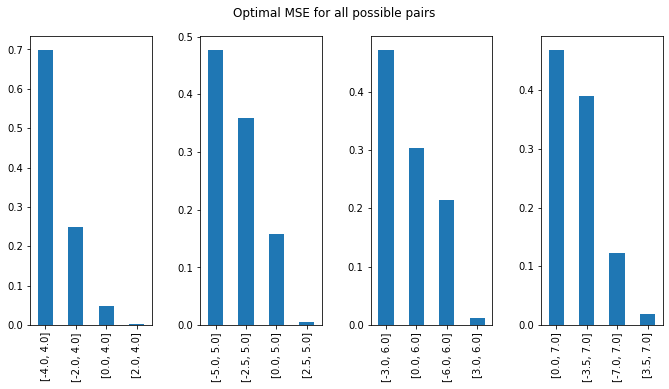

In [335]:
fig, ax = plt.subplots(1,len(opt_choice_mse.columns), sharey=False)
fig.tight_layout()
for i, feat in enumerate(opt_choice_mse):
    opt_choice_mse[feat].value_counts(normalize=True).plot(
        kind='bar',
        ax=ax[i],
        figsize=(10,5)
    )
fig.suptitle("Optimal MSE for all possible pairs")
plt.subplots_adjust(top=0.9, wspace=0.4)
plt.savefig("mse_optimal")
fig.show()
    
                                        

<ipython-input-336-52e1fe11460b>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


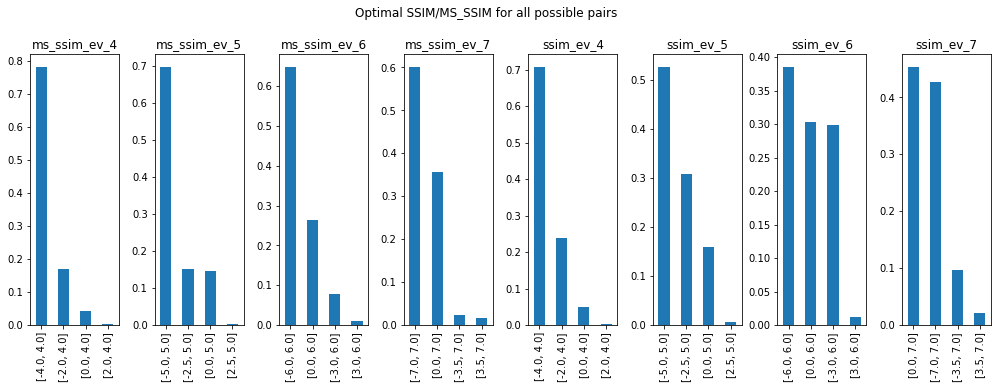

In [336]:
fig, ax = plt.subplots(1,len(opt_choice_ssim.columns), sharey=False)
fig.tight_layout()
for i, feat in enumerate(opt_choice_ssim):
    opt_choice_ssim[feat].value_counts(normalize=True).plot(
        kind='bar',
        ax=ax[i],
        figsize=(15,5),
        title=feat
    )
fig.suptitle("Optimal SSIM/MS_SSIM for all possible pairs")
plt.subplots_adjust(top=0.85,
                   wspace=0.4)
plt.savefig("ms_ssim_optimal")
fig.show()